In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
os.getcwd()

'C:\\Users\\baari\\Documents\\uni\\y3\\project\\final_project\\hard-drive-predictive-maintenance'

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is 9206-39C8

 Directory of C:\Users\baari\Documents\uni\y3\project\final_project\hard-drive-predictive-maintenance

14/02/2024  11:54    <DIR>          .
13/02/2024  16:13    <DIR>          ..
14/02/2024  09:05    <DIR>          .idea
05/02/2024  13:31    <DIR>          .ipynb_checkpoints
07/02/2024  13:16           220,570 analysing_and_processing_data.ipynb
29/01/2024  12:43             4,407 creating_dataframe.ipynb
08/02/2024  10:24    <DIR>          data
14/02/2024  11:54           394,830 decision_tree_and_random_forest_modelling.ipynb
05/02/2024  13:20               168 README.md
               4 File(s)        619,975 bytes
               5 Dir(s)  300,739,637,248 bytes free


In [4]:
ls data

 Volume in drive C is OS
 Volume Serial Number is 9206-39C8

 Directory of C:\Users\baari\Documents\uni\y3\project\final_project\hard-drive-predictive-maintenance\data

08/02/2024  10:24    <DIR>          .
14/02/2024  11:54    <DIR>          ..
07/02/2024  11:20     1,999,438,062 cleaned_and_processed_q1_data.csv
20/01/2024  22:43       567,789,964 data_Q1_2019.zip
24/01/2024  22:11       574,522,473 data_Q2_2019.zip
24/01/2024  22:11       600,893,581 data_Q3_2019.zip
22/01/2024  11:38       645,485,182 data_Q4_2019.zip
14/02/2024  10:12         3,908,856 failed_hdds.csv
29/01/2024  10:21     3,773,635,954 Q1_2019.csv
29/01/2024  11:18     3,859,564,203 Q2_2019.csv
29/01/2024  12:04     4,044,583,480 Q3_2019.csv
29/01/2024  12:38     4,329,796,494 Q4_2019.csv
              10 File(s) 20,399,618,249 bytes
               2 Dir(s)  300,739,637,248 bytes free


In [5]:
df = pd.read_csv('data/cleaned_and_processed_q1_data.csv')

In [6]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,91.0,0.0,100.0,...,83.0,34169.0,20.0,20.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,98.0,0.0,100.0,...,99.0,2145.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,99.0,0.0,100.0,...,100.0,363.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,93.0,0.0,100.0,...,100.0,687.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,...,100.0,183.0,193.0,31.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522889,2019-03-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,0.0,100.0,...,100.0,3.0,250.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
9522890,2019-03-31,ZA10MCEQ,ST8000DM002,8001563222016,0,72.0,15233376.0,94.0,0.0,100.0,...,100.0,152.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
9522891,2019-03-31,ZCH0CRTK,ST12000NM0007,12000138625024,0,81.0,122099464.0,97.0,0.0,100.0,...,100.0,677.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
9522892,2019-03-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,148.0,490.0,100.0,...,100.0,303.0,181.0,33.0,100.0,0.0,100.0,0.0,200.0,0.0


In [7]:
# 60 is the default
pd.get_option('display.max_rows')

60

In [131]:
pd.set_option('display.max_rows', 100)

In [9]:
def find_all_failures(df, serial_number):
    """
    Returns: A subset of the DataFrame containing all rows with 'failure' equal to 1.
    """
    if serial_number not in df['serial_number'].values:
        print(f"Serial number '{serial_number}' not found in the DataFrame.")
        
    ser_num = df[df['serial_number'] == serial_number]
    columns = ['date', 'serial_number', 'failure']
    ser_num = ser_num[columns]
    failures = ser_num[ser_num['failure'] == 1]
    return failures

In [8]:
def total_failures(df, serial_number):
    """
    Returns: The count of total failures from a single hard drive.
    """
    if serial_number not in df['serial_number'].values:
        print(f"Serial number '{serial_number}' not found in the DataFrame.")
        
    ser_num = df[df['serial_number'] == serial_number]
    failure_count = (ser_num['failure'] == 1).sum()
    return failure_count

In [11]:
unique_hdds = df['serial_number'].unique()
unique_hdds.size

114574

In [12]:
find_all_failures(df, 'ZA11VCRQ')

,date,serial_number,failure
8399383,2019-03-21,ZA11VCRQ,1


### Warning: This takes a long time

In [13]:
for hdd_ser in tqdm(unique_hdds):
    if total_failures(df, hdd_ser) > 1:
        print(hdd_ser)

  3%|██▎                                                                      | 3713/114574 [52:53<26:18:58,  1.17it/s]


KeyboardInterrupt: 

In [14]:
df['date'].dtype

dtype('O')

In [15]:
# Getting the serial number of the hard drives that have failed at least once
failed_hdds = df.loc[df.failure==1]['serial_number']

In [16]:
len(failed_hdds)

418

In [17]:
# Filters the dataframe to include only rows where the serial number is in the failed hdds
df = df.loc[df['serial_number'].isin(failed_hdds)]

In [18]:
df.shape

(18588, 33)

In [19]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
154,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
263,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
385,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
465,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
948,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274159,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,100.0,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
9274964,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,93.0,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0
9285077,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,96.0,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0
9304668,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,98.0,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0


In [20]:
# Reset the index and drop the old index
df = df.reset_index(drop=True)

In [21]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,100.0,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
18584,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,93.0,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0
18585,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,96.0,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0
18586,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,98.0,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0


In [22]:
df.to_csv('data/failed_hdds.csv', index=False)

In [3]:
df = pd.read_csv('data/failed_hdds.csv')

In [4]:
df['date'].dtype

dtype('O')

## Analysing failed hard drive failures

In [5]:
unique_hdds = df['serial_number'].unique()
unique_hdds.size

418

In [9]:
count = 0
for hdd_ser in tqdm(unique_hdds):
    if total_failures(df, hdd_ser) > 1:
        print(hdd_ser)
        count += 1
        
print(f'Total hard drives with a failure count over 1: {count}')
if count == 0:
    print("All hard drives have either 0 or 1 failures")

100%|███████████████████████████████████████████████████████████████████████████████| 418/418 [00:00<00:00, 498.33it/s]

Total hard drives with a failure count over 1: 0
All hard drives have either 0 or 1 failures


In [27]:
df[df['serial_number'] == 'Z304JN7J']

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
403,2019-01-02,Z304JN7J,ST4000DM000,4000787030016,0,118.0,186070184.0,92.0,0.0,100.0,...,97.0,7273.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
802,2019-01-03,Z304JN7J,ST4000DM000,4000787030016,0,118.0,178727040.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1196,2019-01-04,Z304JN7J,ST4000DM000,4000787030016,0,112.0,48739088.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
1585,2019-01-05,Z304JN7J,ST4000DM000,4000787030016,0,114.0,59957400.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
1973,2019-01-06,Z304JN7J,ST4000DM000,4000787030016,0,116.0,114838640.0,92.0,0.0,100.0,...,97.0,7273.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
2358,2019-01-07,Z304JN7J,ST4000DM000,4000787030016,0,120.0,2121928.0,92.0,0.0,100.0,...,97.0,7273.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
2741,2019-01-08,Z304JN7J,ST4000DM000,4000787030016,0,118.0,168567288.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
3117,2019-01-09,Z304JN7J,ST4000DM000,4000787030016,0,116.0,106967816.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
3486,2019-01-10,Z304JN7J,ST4000DM000,4000787030016,0,119.0,231100456.0,92.0,0.0,100.0,...,97.0,7273.0,24.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0


# Finding the Remaining Useful Life (RUL)

In [6]:
# Calculates the maximum value (latest date) for each group (serial number)
df.loc[:, 'end_date'] = df.groupby('serial_number')['date'].transform('max')

In [7]:
df['end_date'].dtype

dtype('O')

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [9]:
df['date'].dtype

dtype('<M8[ns]')

In [10]:
df['end_date'].dtype

dtype('<M8[ns]')

In [11]:
df.loc[:, 'date_diff'] = df['end_date'] - df['date']
df.loc[:, 'date_diff'].describe()

count                         18588
mean     29 days 11:31:57.366042608
std      21 days 08:23:28.118660467
min                 0 days 00:00:00
25%                11 days 00:00:00
50%                26 days 00:00:00
75%                45 days 00:00:00
max                88 days 00:00:00
Name: date_diff, dtype: object

In [12]:
df['date_diff'].dtype

dtype('<m8[ns]')

In [13]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,end_date,date_diff
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-27,26 days
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,2019-01-27,26 days
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-02-22,52 days
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-25,83 days
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-28,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-29,0 days
18584,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days
18585,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,2019-03-29,0 days
18586,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days


In [14]:
df.isnull().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
end_date                0
date_diff               0
dtype: int64

## Dropping unwanted columns

In [15]:
# axis=1 to drop columns
df = df.drop(['date', 'serial_number', 'model', 'end_date'], axis=1)
df

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,date_diff
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,26 days
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,26 days
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,52 days
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,83 days
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,1.0,100.0,16.0,...,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,0 days
18584,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,7.0,100.0,0.0,...,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days
18585,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,16.0,100.0,0.0,...,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,0 days
18586,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,3.0,100.0,418.0,...,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days


## Checking the lowest and highest values of label data values (date_diff)

In [16]:
min_value = df['date_diff'].min()
max_value = df['date_diff'].max()
print(f'Target values will range from {min_value} to {max_value}')

Target values will range from 0 days 00:00:00 to 88 days 00:00:00


# Creating train and test splits

In [17]:
X = df.drop(['date_diff'], axis=1).values

In [18]:
# .dt.days extracts the number of days from a dataframe column that contains datetime values
y = df['date_diff'].dt.days.values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train data features: {X_train.shape}, Train data labels: {y_train.shape}\n"
      f"Test data features: {X_test.shape}, Test data labels: {y_test.shape}")

Train data features: (14870, 30), Train data labels: (14870,)
Test data features: (3718, 30), Test data labels: (3718,)


# Using the Decision Tree Regressor from sklearn

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nsquared_error = 455.178\nsamples = 14870\nvalue = 29.58'),
 Text(0.25, 0.5, 'x[9] <= 369.0\nsquared_error = 444.977\nsamples = 14533\nvalue = 30.266'),
 Text(0.125, 0.16666666666666666, 'squared_error = 450.65\nsamples = 13212\nvalue = 31.425'),
 Text(0.375, 0.16666666666666666, 'squared_error = 240.299\nsamples = 1321\nvalue = 18.668'),
 Text(0.75, 0.5, 'x[21] <= 415.5\nsquared_error = 0.003\nsamples = 337\nvalue = 0.003'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.026\nsamples = 37\nvalue = 0.027'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 300\nvalue = 0.0')]

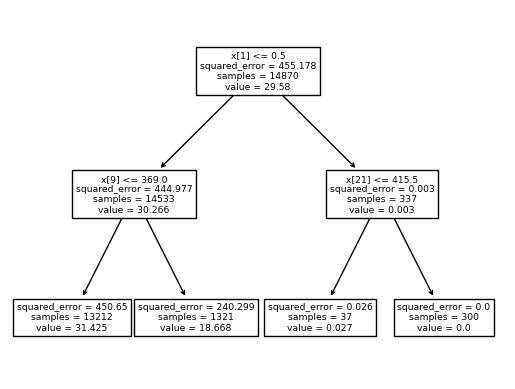

In [146]:
from sklearn import tree

DTR_sklearn = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=2)
DTR_sklearn.fit(X_train, y_train)
tree.plot_tree(DTR_sklearn)

In [111]:
y_pred_DTR_sklearn = DTR_sklearn.predict(X_test)

### Calculating the Root Mean Squared Error (RMSE)

In [21]:
from sklearn.metrics import root_mean_squared_error

rmse_DTR_sklearn = root_mean_squared_error(y_test, y_pred_DTR_sklearn)
print(f'Decision Tree Regressor RMSE: {rmse_DTR_sklearn}')

Decision Tree Regressor RMSE: 5.158599467580101


### Calculating the R^2 score

In [22]:
score_DTR_sklearn = DTR_sklearn.score(X_test, y_test)
print(f'Decision Tree Regressor R^2 score: {score_DTR_sklearn}')

Decision Tree Regressor R^2 score: 0.941897072304893


### Plotting actual vs predicted values

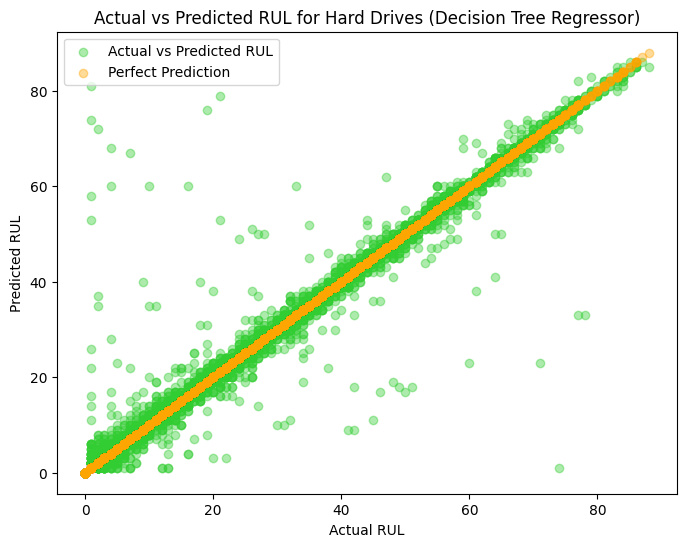

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DTR_sklearn, alpha=0.4, label='Actual vs Predicted RUL', color='limegreen')
plt.scatter(y_test, y_test, alpha=0.4, label='Perfect Prediction', color='orange')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Decision Tree Regressor)')
plt.legend(loc='upper left')
plt.show()

In [73]:
print(f'Minimum value: {min(y_pred_DTR_sklearn)}')
print(f'Mean: {np.mean(y_pred_DTR_sklearn)}')
print(f'Median: {np.median(y_pred_DTR_sklearn)}')
print(f'Standard Deviation: {np.std(y_pred_DTR_sklearn)}')
print(f'Maxiumum value: {max(y_pred_DTR_sklearn)}')

Minimum value: 0.0
Mean: 29.312937062937063
Median: 25.0
Standard Deviation: 21.306885368371745
Maxiumum value: 86.0


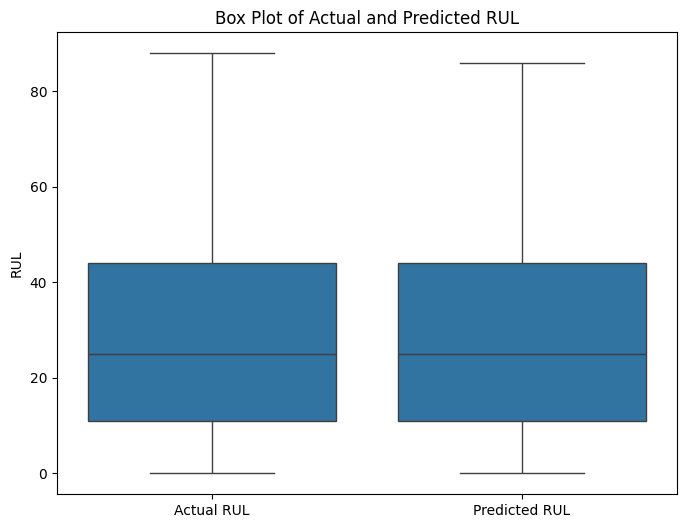

In [52]:
combined_data = np.concatenate([y_test, y_pred_DTR_sklearn])
labels = ['Actual RUL'] * len(y_test) + ['Predicted RUL'] * len(y_pred_DTR_sklearn)

plt.figure(figsize=(8, 6))
sns.boxplot(x=labels, y=combined_data)
plt.title('Box Plot of Actual and Predicted RUL')
plt.ylabel('RUL')
plt.show()

In [74]:
from collections import Counter

counter = Counter(y_pred_DTR_sklearn)
sorted_counts = sorted(counter.items(), key=lambda x: x[0])  # Sort the items by value in ascending order

for value, count in sorted_counts:
    print(f"Value: {value}, Count: {count}")

Value: 0.0, Count: 81
Value: 1.0, Count: 55
Value: 2.0, Count: 92
Value: 3.0, Count: 73
Value: 4.0, Count: 85
Value: 5.0, Count: 95
Value: 6.0, Count: 85
Value: 7.0, Count: 86
Value: 8.0, Count: 80
Value: 9.0, Count: 67
Value: 10.0, Count: 52
Value: 11.0, Count: 87
Value: 12.0, Count: 79
Value: 13.0, Count: 60
Value: 14.0, Count: 74
Value: 15.0, Count: 69
Value: 16.0, Count: 67
Value: 17.0, Count: 71
Value: 18.0, Count: 71
Value: 19.0, Count: 78
Value: 20.0, Count: 74
Value: 21.0, Count: 48
Value: 22.0, Count: 75
Value: 23.0, Count: 67
Value: 24.0, Count: 56
Value: 25.0, Count: 42
Value: 26.0, Count: 70
Value: 27.0, Count: 53
Value: 28.0, Count: 56
Value: 29.0, Count: 57
Value: 30.0, Count: 61
Value: 31.0, Count: 43
Value: 32.0, Count: 42
Value: 33.0, Count: 62
Value: 34.0, Count: 51
Value: 35.0, Count: 36
Value: 36.0, Count: 52
Value: 37.0, Count: 57
Value: 38.0, Count: 36
Value: 39.0, Count: 48
Value: 40.0, Count: 29
Value: 41.0, Count: 47
Value: 42.0, Count: 37
Value: 43.0, Count: 4

In [85]:
counter = Counter(y_pred_DTR_sklearn)

# Define the bin ranges
bins = [(i, i+9) for i in range(0, 81, 10)]
# print(bins)

# Initialise counters for each bin
bin_counts = {bin_range: 0 for bin_range in bins}
# print(bin_counts)

# Count occurrences within each bin
for value, count in counter.items():
    for bin_range in bins:
        if bin_range[0] <= value <= bin_range[1]:
            bin_counts[bin_range] += count

# Print the counts for each bin
for bin_range, count in bin_counts.items():
    print(f"Values {bin_range[0]} to {bin_range[1]}: {count} occurrences")

Values 0 to 9: 799 occurrences
Values 10 to 19: 708 occurrences
Values 20 to 29: 598 occurrences
Values 30 to 39: 488 occurrences
Values 40 to 49: 385 occurrences
Values 50 to 59: 316 occurrences
Values 60 to 69: 232 occurrences
Values 70 to 79: 150 occurrences
Values 80 to 89: 42 occurrences


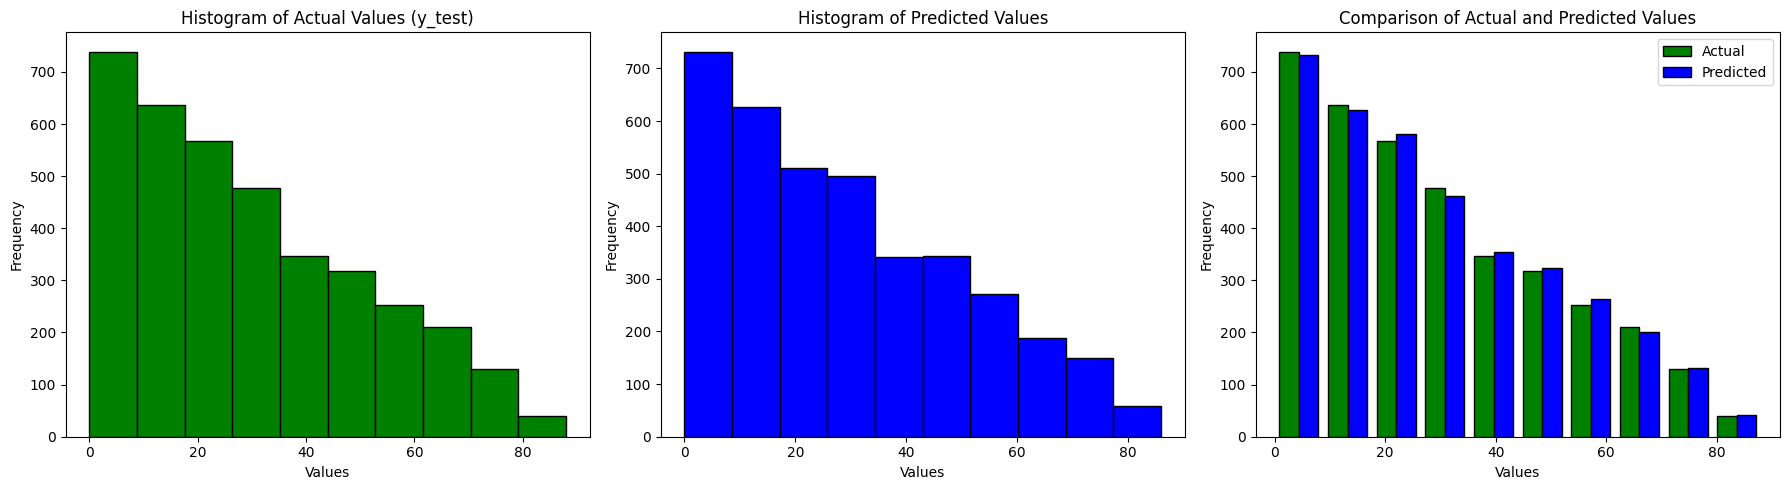

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot histogram for actual values
axs[0].hist(y_test, color='green', edgecolor='black')
axs[0].set_title('Histogram of Actual Values (y_test)')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Plot histogram for predicted values
axs[1].hist(y_pred_DTR_sklearn, color='blue', edgecolor='black')
axs[1].set_title('Histogram of Predicted Values')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Compare the two histograms
axs[2].hist([y_test, y_pred_DTR_sklearn], color=['green', 'blue'], edgecolor='black', label=['Actual', 'Predicted'])
axs[2].set_title('Comparison of Actual and Predicted Values')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')
axs[2].legend()

plt.tight_layout()
plt.show()

# Using Random Forest Regressor from sklearn

In [93]:
from sklearn.ensemble import RandomForestRegressor

model_RFR_sklearn = RandomForestRegressor()
model_RFR_sklearn.fit(X_train, y_train)
y_pred_RFR_sklearn = model_RFR_sklearn.predict(X_test)

### Calculating the RMSE

In [94]:
rmse_RFR_sklearn = root_mean_squared_error(y_test, y_pred_RFR_sklearn)
print(f'Random Forest Regressor RMSE: {rmse_RFR_sklearn}')

Random Forest Regressor RMSE: 3.221574440428729


### Calculating the R^2 score

In [95]:
score_RFR_sklearn = model_RFR_sklearn.score(X_test, y_test)
print(f'Random Forest Regressor R^2 score: {score_RFR_sklearn}')

Random Forest Regressor R^2 score: 0.9773394346769202


### Plotting actual vs predicted values

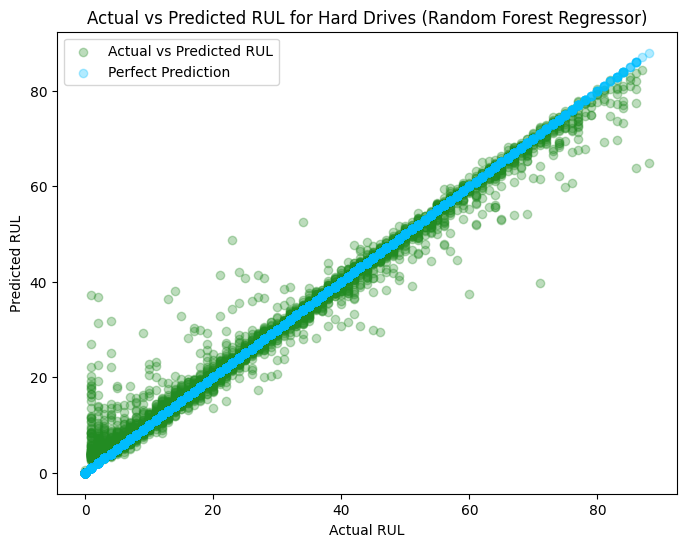

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RFR_sklearn, alpha=0.3, label='Actual vs Predicted RUL', color='forestgreen')
plt.scatter(y_test, y_test, alpha=0.3, label='Perfect Prediction', color='deepskyblue')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Random Forest Regressor)')
plt.legend()
plt.show()

### Implementing my own Decision Tree Regressor from scratch

In [147]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf(self):
        return self.value is not None


class MyDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    def grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape

        # 1. Stopping condition: either reached max depth or insufficient samples
        if depth == self.max_depth or num_samples < self.min_samples_split:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        # 2. Find the best split
        feature_index, threshold = self.best_split(X, y)

        # 3. Stopping conditions if no valid split found
        if feature_index is None:
            return Node(value=np.mean(y))
        # If a feature index exists but there is no threshold
        if threshold is None:
            return Node(value=np.mean(y))

        # 4. Create boolean arrays for left and right splits
        indices_left = X[:, feature_index] <= threshold
        indices_right = X[:, feature_index] > threshold
        
        # 5. Use the boolean arrays to create subsets of data for left and right splits
        X_left, y_left = X[indices_left], y[indices_left]
        X_right, y_right = X[indices_right], y[indices_right]

        # 6. Recursively grow left and right subtrees
        left_subtree = self.grow_tree(X_left, y_left, depth + 1)
        right_subtree = self.grow_tree(X_right, y_right, depth + 1)

        # 7. Create and return the current node
        return Node(feature_index=feature_index, threshold=threshold, left=left_subtree, right=right_subtree)

    def best_split(self, X, y):
        num_samples, num_features = X.shape

        # 1. Check if there is only one sample or fewer, cannot split
        if num_samples <= 1:
            return None, None  

        # 2. Calculate the variance of the entire dataset
        var_parent = np.var(y)
        
        # 3. Initialise variables to track the best split
        best_var_reduction = 0
        best_split = None, None

        # 4. Loop through each feature/column
        for feature_index in range(num_features):
            # 5. Get the unique values in the current feature
            thresholds = np.unique(X[:, feature_index])
            # print(thresholds)
            
            # 6. Loop through each unique value as a potential threshold
            for threshold in thresholds:
                # 7. Create boolean arrays for the left and right splits
                indices_left = X[:, feature_index] <= threshold
                indices_right = X[:, feature_index] > threshold
                
                # 8. Filter y to get the left and right subsets
                y_left = y[indices_left]  # keeps only the elements where indices_left is True
                y_right = y[indices_right]  # keeps only the elements where indices_right is True

                # 9. Skip the split if either side has too few samples
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue

                # 10. Calculate the weighted variance of the children
                weighted_var_child = ((len(y_left) / num_samples) * np.var(y_left) +
                                      (len(y_right) / num_samples) * np.var(y_right))

                # 11. Calculate the variance reduction
                var_reduction = var_parent - weighted_var_child

                # 12. Update the best split if the variance reduction is higher
                if var_reduction > best_var_reduction:
                    best_var_reduction = var_reduction
                    best_split = (feature_index, threshold)
                    # print(f'Best split: {best_split}')
        
        # 13. Return the best split
        return best_split

    def print_tree(self, node=None, indent='  '):
        if node is None:
            node = self.tree

        if node.is_leaf():
            # print(node.value)
            print(f'{node.value:.4f}')
        else:
            print(f'X{node.feature_index} <= {node.threshold}')

            print(f'{indent}Left: ', end='')
            self.print_tree(node.left, indent + '  ')

            print(f'{indent}Right: ', end='')
            self.print_tree(node.right, indent + '  ')


    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])

    def traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)

In [148]:
DTR = MyDecisionTreeRegressor(max_depth=2, min_samples_split=2)
DTR.fit(X_train, y_train)

In [149]:
DTR.print_tree()

X1 <= 0.0
  Left: X9 <= 368.0
    Left: 31.4254
    Right: 18.6684
  Right: X21 <= 414.0
    Left: 0.0270
    Right: 0.0000


In [150]:
y_pred_DTR = DTR.predict(X_test)
rmse_DTR = root_mean_squared_error(y_test, y_pred_DTR)
print(f'Decision Tree Regressor RMSE: {rmse_DTR}')

Decision Tree Regressor RMSE: 20.649170807732233


### Implementing my own Random Forest Regressor from scratch